# Worked Problems for Assessment, Computer Infrastructure Module  
Autumn 2025, Atlantic Technological University  
Author: Susan Collins  

## Problem 1: Data from yfinance  
Brief:
```
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

    Facebook (META)
    Apple (AAPL)
    Amazon (AMZN)
    Netflix (NFLX)
    Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.


### Importing libraries

In [24]:
# import NumPy to manipulate numerical arrays
import numpy as np
# import Python Data Analysis Library
import pandas as pd
# import Matplotlib.PyPlot for plotting
import matplotlib.pyplot as plt
# import yfinance for financial data for these exercises
# https://github.com/ranaroussi/yfinance
import yfinance as yf
# Library for handling date and time data, https://docs.python.org/3/library/datetime.html
import datetime as dt
# Library for interfacing with the operating system, https://docs.python.org/3/library/os.html
import os 
# Library for regular expressions, used for string matching
import re


### Downloading financial data  
The [yfinance documentation](https://ranaroussi.github.io/yfinance/) front page
contains a Quick Start guide.  
The [`yfinance.download`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html) function creates a Pandas DataFrame. 


_Note:  The call to `yfinance.download` produced a FutureWarning to alert users 
that the default value of the `auto_adjust` argument has changed. Should I
suppress this warning or look further into the uses of this argument?  
This [StackOverflow answer](https://stackoverflow.com/a/37453925) says that the auto_adjust parameter will adjust the historical stock prices for splits and dividends, so that long-term comparisons of stick prices can be made. As we are looking at prices over the span of 5 days, this parameter is very unlikely to have any effect on this analysis; but if I call it with its default value of True, it does suppress the annoying warning._

In [25]:
# Testing the yfinance.download function with a multiple stock tickers
download_data = yf.download(['META','AAPL','AMZN','NFLX','GOOG'], period='5d', interval='1h', auto_adjust=True)

# Look at the resulting DataFrame.
#print(download_data.columns)
print(download_data.shape)
print(download_data.dtypes)
#download_data

[*********************100%***********************]  5 of 5 completed

(35, 25)
Price   Ticker
Close   AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
High    AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Low     AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Open    AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Volume  AAPL        int64
        AMZN        int64
        GOOG        int64
        META        int64
        NFLX        int64
dtype: object


### Creating output filename and output directory

In [26]:
# Current date and time.
now = dt.datetime.now()

# Show.
print(f"Now is {now}.")

# Use datetime.datetime.strftime to create the output filename as a string, 
# in the requested format.  
# Handy cheat sheet for strftime format specifiers available at
# https://strftime.org/ 
data_output_filename = now.strftime("%Y%m%d-%H%M%S.csv")
print(f"Output filename is {data_output_filename}.")

Now is 2025-12-18 02:01:24.417983.
Output filename is 20251218-020124.csv.


In [27]:
# Set the directory for the output CSV files.
data_output_dir = "data/"

# Check if this directory exists
# (adapted from https://stackoverflow.com/a/1274436)
if not os.path.isdir(data_output_dir):
    os.makedirs(data_output_dir)
    print(f"Created data directory at {data_output_dir}")
else:
    print(f"Data directory exists at {data_output_dir}")


Data directory exists at data/


### Writing financial data to CSV file  
Pandas has a function [`pandas.DataFrame.to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) to write to CSV files.

In [28]:
# Write DataFrame to a test CSV file in data directory.
download_data.to_csv(data_output_dir + data_output_filename)

## Problem 2: Plotting Data  
Brief:  
```
Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.


### Checking for the read-in  data directory  

This section of code may be run independently of the previous section, so we must  
check again that the data directory exists and that an appropriate CSV file is 
available.

In [29]:
# Set the directory from which to read CSV files.
data_read_dir = "data/"

# Check if this directory exists
# (adapted from https://stackoverflow.com/a/1274436)
if not os.path.isdir(data_read_dir):
    print(f"Data directory {data_read_dir} does not exist!")
else:
    print(f"Found data directory at {data_read_dir}")

Found data directory at data/


### Checking the read-in data directory for the latest CSV file  
Approach: 
- List the files in the data directory
- Find those with appropriate filenames
- Sort them by name (which should be the file creation time)
- Get the name of the newest file

In [30]:
# List the files in the data_read directory
data_files = os.listdir(data_read_dir)

data_files

['20251218-020124.csv',
 '9999.csv',
 'testfile.csv',
 'testfile.foo',
 '20251218-012357.csv',
 '12345.csv',
 '20251218-003922.csv',
 '12345678-123456.foo',
 '20251218-014316.csv']

In [31]:
# Filter out the files that match the expected data filename format,
# i.e. YYYYMMDD-HHmmss.csv 
# (adapted from https://stackoverflow.com/a/56223939) 
# regex reference: https://www.w3schools.com/python/python_regex.asp

# Search pattern to match valid data files
search_pattern = r'[0-9]{8}[-][0-9]{6}\.csv$'
# Empty list to hold matching filenames
data_files_filtered = []

# Iterate through the files in the data_read directory and get the ones with 
# filenames matching the pattern 
for file in data_files:
    if re.match(search_pattern, file):
        data_files_filtered.append(file)

# Show filtered data files
data_files_filtered

['20251218-020124.csv',
 '20251218-012357.csv',
 '20251218-003922.csv',
 '20251218-014316.csv']

In [32]:
# Sort the filtered data files to get the latest one
data_read_filename = sorted(data_files_filtered, reverse=True)[0]

# Show the final data filename
data_read_filename

'20251218-020124.csv'

### Reading in from the CSV file

In [33]:
# Reading DataFrame from CSV file using pandas.read_csv()
# (Ref: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
# Parameters:
# header=[0,1] - The first two rows of the CSV file contain MultiIndex header information,
# index_col=0 - I want column 0, the dates, to be the index of the resulting DataFrame,
# parse_dates=[0] - I want the index values to be parsed as dates (i.e. as datetime objects.)
# (adapted from https://stackoverflow.com/a/37453925)
plot_data = pd.read_csv(data_read_dir + data_read_filename, header=[0,1], index_col=0, parse_dates=[0])

# Look at first few rows of resulting DataFrame
#print(plot_data.columns)
#print(plot_data.shape)
#print(plot_data.index)
#print(plot_data.dtypes)

plot_data.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-11 14:30:00+00:00  276.119995  230.880005  317.059998  652.609985   
2025-12-11 15:30:00+00:00  275.825012  228.850006  315.549988  646.609985   
2025-12-11 16:30:00+00:00  277.904999  230.082504  316.059998  648.840027   
2025-12-11 17:30:00+00:00  277.522614  229.479996  313.390015  649.390015   
2025-12-11 18:30:00+00:00  277.760010  229.844193  313.605011  651.919983   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-11 14:30:00+00:00  94.394997  279.579987  232.110001  321.989990   
2025-12-11 15:30:00+00:00  94.084999  276.589996  231.039993  317.890015   
2025-12-11 16:30:00+00:00  94.620003  278.179993  230.279999  316.540009   
2025-12-11 17:30:00+00:00  94.089996  278.350006  230.399002  316.543213   
2025-12-11 18:30:00+00:00  94.419899  278.209991  230.079407  314.559998   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-11 14:30:00+00:00  655.280029  94.510002  ...  279.095001  230.710007   
2025-12-11 15:30:00+00:00  653.184998  94.680000  ...  276.114990  230.860001   
2025-12-11 16:30:00+00:00  649.719971  94.820000  ...  275.820007  228.889999   
2025-12-11 17:30:00+00:00  650.450012  94.769997  ...  277.920013  230.089996   
2025-12-11 18:30:00+00:00  653.414978  94.459999  ...  277.524994  229.479996   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-11 14:30:00+00:00  320.940002  642.729980  93.855003  6887208   
2025-12-11 15:30:00+00:00  317.075012  652.539978  94.394997  2343607   
2025-12-11 16:30:00+00:00  315.524994  646.710022  94.084999  2412367   
2025-12-11 17:30:00+00:00  316.057495  648.835022  94.612198  1473658   
2025-12-11 18:30:00+00:00  313.410004  649.340027  94.099998  1432317   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-11 14:30:00+00:00  4677750  3634473  2302563  9038298  
2025-12-11 15:30:00+00:00  2150176  1521142   990587  4362495  
2025-12-11 16:30:00+00:00  1738077  1109293   586515  3473366  
2025-12-11 17:30:00+00:00  1695827  2408094   651876  2643380  
2025-12-11 18:30:00+00:00  1454306  2208647   660057  2583434  

[5 rows x 25 columns]

### Sanity checking: compare downloaded and read DataFrames  
For the purposes of this notebook, we can compare the downloaded DataFrame to 
the DataFrame read in from the CSV file. This will tell us if the file has been 
exported and read back in accurately.

The [`pandas.DataFrame.compare`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html) 
function lets us compare two DataFrames and returns another DataFrame showing 
non-matching values (and Nan where the values are a match.)


In [34]:
# Comparing the downloaded and read-from-file DataFrames.
plot_data.compare(download_data).head()

Price                     Close                                            \
Ticker                     AAPL              AMZN                    GOOG   
                           self other        self       other        self   
Datetime                                                                    
2025-12-11 14:30:00+00:00   NaN   NaN         NaN         NaN  317.059998   
2025-12-11 15:30:00+00:00   NaN   NaN  228.850006  228.850006         NaN   
2025-12-11 16:30:00+00:00   NaN   NaN  230.082504  230.082504  316.059998   
2025-12-11 17:30:00+00:00   NaN   NaN  229.479996  229.479996         NaN   
2025-12-11 18:30:00+00:00   NaN   NaN         NaN         NaN         NaN   

Price                                                              High  \
Ticker                                      NFLX                   AMZN   
                                other       self      other        self   
Datetime                                                                  
2025-12-11 14:30:00+00:00  317.059998        NaN        NaN  232.110001   
2025-12-11 15:30:00+00:00         NaN        NaN        NaN         NaN   
2025-12-11 16:30:00+00:00  316.059998  94.620003  94.620003         NaN   
2025-12-11 17:30:00+00:00         NaN        NaN        NaN         NaN   
2025-12-11 18:30:00+00:00         NaN        NaN        NaN         NaN   

Price                                  ...        Low            Open        \
Ticker                                 ...       NFLX            AAPL         
                                other  ...       self      other self other   
Datetime                               ...                                    
2025-12-11 14:30:00+00:00  232.110001  ...  92.760002  92.760002  NaN   NaN   
2025-12-11 15:30:00+00:00         NaN  ...        NaN        NaN  NaN   NaN   
2025-12-11 16:30:00+00:00         NaN  ...  93.989998  93.989998  NaN   NaN   
2025-12-11 17:30:00+00:00         NaN  ...  94.074997  94.074997  NaN   NaN   
2025-12-11 18:30:00+00:00         NaN  ...  94.050003  94.050003  NaN   NaN   

Price                                                                    
Ticker                           AMZN             GOOG       NFLX        
                                 self       other self other self other  
Datetime                                                                 
2025-12-11 14:30:00+00:00         NaN         NaN  NaN   NaN  NaN   NaN  
2025-12-11 15:30:00+00:00  230.860001  230.860001  NaN   NaN  NaN   NaN  
2025-12-11 16:30:00+00:00         NaN         NaN  NaN   NaN  NaN   NaN  
2025-12-11 17:30:00+00:00  230.089996  230.089996  NaN   NaN  NaN   NaN  
2025-12-11 18:30:00+00:00  229.479996  229.479996  NaN   NaN  NaN   NaN  

[5 rows x 30 columns]

The `pandas.DataFrame.compare` function is showing many values as not identical, 
although they appear to be, due to the limited precision of floating-point 
representation in Python (e.g. [this article](https://www.geeksforgeeks.org/python/comparing-floating-points-number-for-almost-equality-in-python/).) 

Instead, we can use the `numpy.isclose()` function which can compare values with 
a small default tolerance level. (Suggested by [this StackOverflow answer](https://stackoverflow.com/a/33549675).)

In [35]:
# Sanity check.
# Compare the downloaded data to the data read from CSV, and show the first
# three rows of results 
print(np.isclose(download_data,plot_data)[0:2,])

# Check if all the vales in the array of results are True,
# (adapted from https://stackoverflow.com/a/55834412 and 
# https://numpy.org/devdocs/reference/generated/numpy.ndarray.all.html#numpy.ndarray.all) 
df_comparison_result = np.isclose(download_data,plot_data).all()

print(f"Are all values in the np.isclose result array True? {df_comparison_result}")

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]]
Are all values in the np.isclose result array True? True


### Preparing the plot output directory  
As before, we must check that the plot output directory exists, or create it.

In [36]:
# Setting the plot output directory
plot_dir = "plots/"

# Check if this directory exists
# (adapted from https://stackoverflow.com/a/1274436)
if not os.path.isdir(plot_dir):
    os.makedirs(plot_dir)
    print(f"Created plot output directory at {plot_dir}")
else:
    print(f"Plot output directory exists at {plot_dir}")


# Creating the name of the plot output file, from the data read file 
# minus its extension
plot_output_filename = data_read_filename[:-4]+".png"

# Show the plot output filename
plot_output_filename


Plot output directory exists at plots/


'20251218-020124.png'

### Plotting the data  
Pandas has its own DataFrame plot function, [`Pandas.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html), that calls Matplotlib. 

''

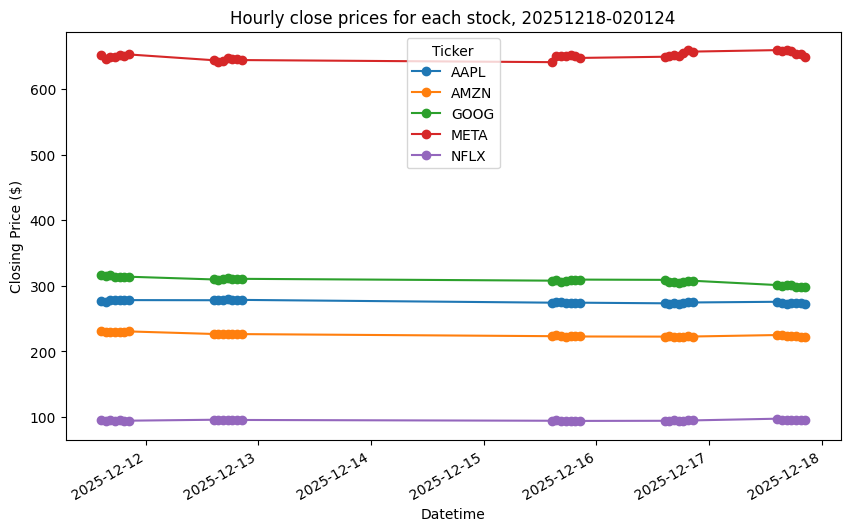

In [37]:
# Plot the Close prices for each of the five stocks.

fig,ax = plt.subplots(figsize=(10, 6))

# The plot title contains the data timestamp, from the read-in filename
plt.title("Hourly close prices for each stock, " + data_read_filename[:-4])
plt.ylabel("Closing Price ($)")
plt.xlabel("Date")

plot_data["Close"].plot(ax=ax, marker='o')

plt.savefig(plot_dir + plot_output_filename)

;

## End